문장 -> 형태소 분석 -> 어휘사전 구축(벡터화)  

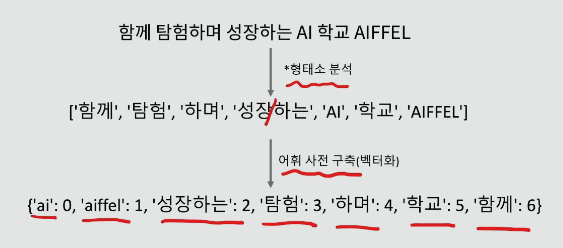


* CountVectorizer : 각 문장에서 단어 출현 횟수 카운팅하는 방법 (BOW, Bag of Word)
* TfidfVectorizer : 타 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법 (TF-IDF)

# 1. 자연어 처리 기초

## 1)형태소 분석기
- konlpy: 한국어 처리 위한 형태소 분석기
- 형태소 : 의미를 갖는 요소로서는 더 이상 분석할 수 없는 가장 작은 말의 단위

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#konlpy 설치

!pip install konlpy -qq

In [3]:
#라이브러리 불러오기 (okt)

import konlpy
from konlpy.tag import Okt
tokenizer = Okt()

In [4]:
#토큰화

text = '함께 탐험하며 성장하는 AI학교 Aiffel'
tokenizer.morphs(text)

['함께', '탐험', '하며', '성장하는', 'AI', '학교', 'Aiffel']

In [5]:
#토큰화 (명사만 추출)

tokenizer.nouns(text)

['탐험', '학교']

In [6]:
#토큰화 (품사 태깅)

tokenizer.pos(text)

[('함께', 'Adverb'),
 ('탐험', 'Noun'),
 ('하며', 'Verb'),
 ('성장하는', 'Adjective'),
 ('AI', 'Alpha'),
 ('학교', 'Noun'),
 ('Aiffel', 'Alpha')]

## 2)벡터화

## * CountVectorizer
- 문서에서 단어의 출현 빈도를 기반으로 각 단어를 수치화

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [8]:
#단어 토큰화 (okt)

words = tokenizer.morphs(text)

In [9]:
#데이터 학습 (fit)

vect.fit(words)

CountVectorizer()

In [10]:
#학습된 어휘

vect.get_feature_names_out()

array(['ai', 'aiffel', '성장하는', '탐험', '하며', '학교', '함께'], dtype=object)

In [11]:
#단어 사전

vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [12]:
#단어 사전 크기

len(vect.vocabulary_)

7

In [13]:
#인코딩 (transform)

df_t = vect.transform(words)

In [14]:
#인코딩된 데이터 matrix

df_t.toarray()

array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [15]:
#어휘와 피처(데이터프레임)

pd.DataFrame(df_t.toarray(), columns=vect.get_feature_names())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0


### 새로운 데이터가 들어왔을 경우!

In [16]:
test = 'AI 공부하며 함께 성장해요!'

In [17]:
words = tokenizer.morphs(test)
words

['AI', '공부', '하며', '함께', '성장해요', '!']

In [18]:
#인코딩된 데이터 매트릭스를 가지고 넣어보기

test_t = vect.transform(words)
test_t.toarray()

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [19]:
pd.DataFrame(test_t.toarray(), columns=vect.get_feature_names())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0


## * TfidfVectorizer
- 문서에서 단어의 상대적인 중요도를 고려하여 각 단어를 수치화
- 문서에 자주 출현하지만 다른 문서에서는 그렇지 않은 단어에 대해 높은 가중치를 부여

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
#tf-idf 어휘사전 구축

vect = TfidfVectorizer()
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [22]:
#인코딩된 데이터 matrix
vect.transform(words).toarray()

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

---

# 2. 감성분석 
  
- 머신러닝 절차

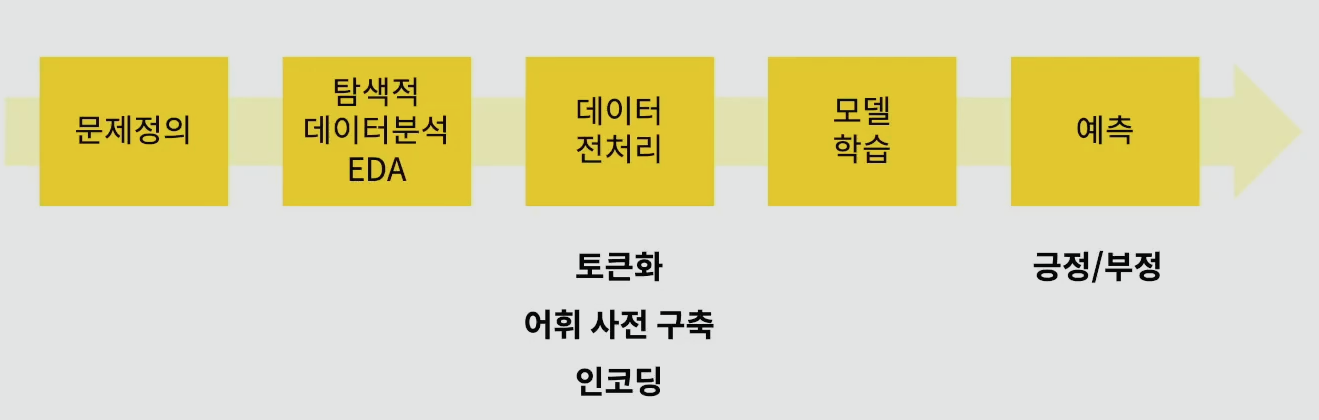

In [23]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")

In [24]:
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [25]:
df.shape

(150000, 3)

In [26]:
df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

- 0 부정, 1 긍정

In [27]:
df.isna().sum()

id          0
document    5
label       0
dtype: int64

* 리뷰가 없는게 5개니까 삭제해주자

In [28]:
df = df.dropna()
df.shape

(149995, 3)

* 5개가 잘 삭제되었다

In [29]:
df['len'] = df['document'].apply(len)
df.head()

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


* 문장의 길이가 추가되었다

<AxesSubplot:ylabel='Frequency'>

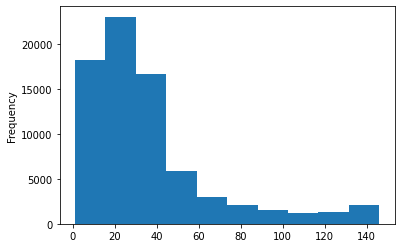

In [30]:
#len 시각화 (label == 0)

import matplotlib.pyplot as plt
df[df.label==0]['len'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

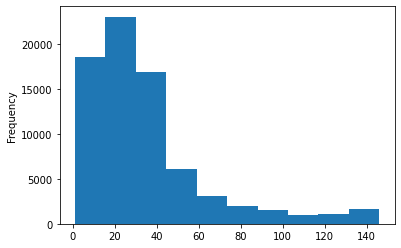

In [31]:
#len 시각화 (label == 1)

import matplotlib.pyplot as plt
df[df.label==1]['len'].plot(kind='hist')

In [32]:
#데이터 샘플링 (1000개)

df = df[:1000]
df.shape

(1000, 4)

In [33]:
#토큰화

vect = CountVectorizer(tokenizer= tokenizer.morphs)
vectors = vect.fit_transform(df['document'])

### 머신러닝

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state = 2022)
cross_val_score(model, vectors, df['label'], scoring = 'f1', cv=5).mean()

0.6634352457852256

# 3. 자연어 전처리
- 어휘사전 구축 
    - 00% 이상 나타나는 단어는 무시
    - 최소 N개 문장에만 나타나는 단어만 유지
- 불용어(stopword) : 큰 의미가 없는 단어 (을, 는, 이, 가 등등)
- 띄어쓰기
- 반복어 정리
- 맞춤법 검사

## 어휘사전 구축

In [35]:
# 토큰화 (max_df) N개보다 큰 단어 수 무시 (max_df)

#10번이상 등장한 단어는 무시해라
vect = CountVectorizer(tokenizer = tokenizer.morphs, max_df = 10)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model,vectors, df['label'], scoring='accuracy', cv=5).mean()

0.643

In [36]:
# 토큰화 (min_df) N개보다 작은 단어수 무시 (min_df)

#2번 이하로 등장한 단어는 무시해라
vect = CountVectorizer(tokenizer = tokenizer.morphs, min_df = 2)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model,vectors, df['label'], scoring='accuracy', cv=5).mean()

0.689

## 불용어

In [37]:
text ='함께 탐험하며 성장하는 AI학교 Aiffel'
stop_words = ['하며','ai']
vect = CountVectorizer(stop_words = stop_words)
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 4, '탐험': 2, '성장하는': 1, '학교': 3, 'aiffel': 0}

## 띄어쓰기
- 자동으로 띄어쓰기를 해준다

In [38]:
#spacing library 설치

!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-zl3u6dc5
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-zl3u6dc5
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit 04aeebcbe26b109486a642e57dc58665c4818cf3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 825.3 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 69.5 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 53.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 KB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 93.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 98.3 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [39]:
from pykospacing import Spacing
spacing = Spacing()
spacing("김형호영화시장분석가는'1987'의네이버영화정보네티즌10점평에서언급된단어들을지난해12월27일부터올해1월10일까지통계프로그램R과KoNLP패키지로텍스트마이닝하여분석했다.")

"김형호 영화시장 분석가는 '1987'의 네이버 영화 정보 네티즌 10점 평에서 언급된 단어들을 지난해 12월 27일부터 올해 1월 10일까지 통계 프로그램 R과 KoNLP 패키지로 텍스트마이닝하여 분석했다."

## 반복되는 글자 정리
- 반복되는 글을 특성 글자수만큼만 보여주기

In [41]:
!pip install soynlp

In [42]:
from soynlp.normalizer import *
emoticon_normalize('하하하하하ㅋㅋㅋㅋㅋ호호호호호ㅠㅠㅠㅠㅠㅠㅠ', num_repeats=3)

'하하하ㅋㅋㅋ호호호ㅠㅠㅠ'

In [43]:
!pip install git+https://github.com/jungin500/py-hanspell -qq
!pip install git+https://github.com/ssut/py-hanspell.git -qq

## 맞춤법 검사기

In [44]:
!pip install git+https://github.com/jungin500/py-hanspell

  Cloning https://github.com/jungin500/py-hanspell to /tmp/pip-req-build-_fombjg_
  Running command git clone --filter=blob:none --quiet https://github.com/jungin500/py-hanspell /tmp/pip-req-build-_fombjg_
  Resolved https://github.com/jungin500/py-hanspell to commit 9cf4ce38a8d259b92dc8af3f35d7c2442e130180
  Preparing metadata (setup.py) ... done


In [45]:

from hanspell import spell_checker
text = "알파고 이전, 2015년부터 만들 어진최초의 AI커뮤니티 모두의연구소.학연,지연,모두연이라는 말이나올만큼 AI의 보금자리로서중요한 역할을하고있는모두의연구소에서 만들었습니다"


In [46]:
result = spell_checker.check(text)

KeyError: 'result'

In [47]:
result.checked

NameError: name 'result' is not defined

# QUIZ

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import konlpy
from konlpy.tag import Okt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 데이터 로드
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")
# 결측치 삭제
df = df.dropna()
# 피처 엔지니어링 (문장의 길이)
df['len'] = df['document'].apply(len)
# 데이터 샘플링
df = df[:1000]

# 토큰화
tokenizer = Okt()

model = RandomForestClassifier(random_state=2022)

for i in [10, 15, 20]:
    vect = CountVectorizer(tokenizer=tokenizer.morphs, max_df = i)
    vectors = vect.fit_transform(df['document'])
    
    print(cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean())

0.6300776326538058
0.6397803806582216
0.6817517114020853
